# 의사결정트리
knn 예제와 동일한 예측을 의사결정트리 알고리즘으로 풀이 한다.

In [12]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv('data/mydata.csv')
data.head(100)

,id,walk,view,sex,payment,country
0,1,17,5,M,176,C
1,2,12,5,M,194,C
2,3,32,12,F,384,C
3,4,25,9,F,329,C
4,5,23,8,F,290,C
5,6,24,8,M,246,C
6,7,22,6,F,235,C
7,8,32,11,F,353,C
8,9,30,10,F,324,C
9,10,13,2,M,93,C


In [14]:
# 더미 코딩
data['country'] = (data['country']=='C')
data.head(5)
# 이곳 까지 KNN과 동일

,id,walk,view,sex,payment,country
0,1,17,5,M,176,True
1,2,12,5,M,194,True
2,3,32,12,F,384,True
3,4,25,9,F,329,True
4,5,23,8,F,290,True


In [19]:
feature_names = ['walk', 'view'] # walk와 view 두개의 column name을 feature_name에 저장
X = data[feature_names] # data 정제 후 X에 저장
X.head(5) # 임의 출력

,walk,view
0,17,5
1,12,5
2,32,12
3,25,9
4,23,8


In [20]:
y = data['country'] # country 관련 data만 y에 저장

In [21]:
# 학습용 데이터와 테스트용 데이터 작성
from sklearn.model_selection import train_test_split
# training data와 test data의 비율을 3:1로 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3) # 의사결정트리 생성(트리depth2)
clf = clf.fit(X_train, y_train) # 의사결정트리에 training data 학습
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
with open("./mytree.dot", 'w') as  f:
    dot_data=tree.export_graphviz(clf, out_file=f, feature_names=feature_names) # 작성된 의사결정 트리를 파일로 작성

In [26]:
# 작성된 파일을 그림파일로 만들기
# 트리 출력은 마크다운 모드에서 ![Alt text](./mytree.png) 입력 후 실행

# !dot -Tpng mytree.dot -o mytree.png
# 상단의 명령어는 리눅스에서 동작하기 때문에 의사결정 트리의 png파일은 미리 제작하여 첨부

'dot'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [25]:
from sklearn import metrics
y_pred = clf.predict(X_test) # 학습된 의사결정트리를 이용해 출신국가 예측
print(metrics.classification_report(y_test, y_pred)) # 예측 결과 출력

             precision    recall  f1-score   support

      False       0.86      0.96      0.91        56
       True       0.97      0.87      0.92        69

avg / total       0.92      0.91      0.91       125



첨부한 의사결정트리
![Alt text](./mytree.png)

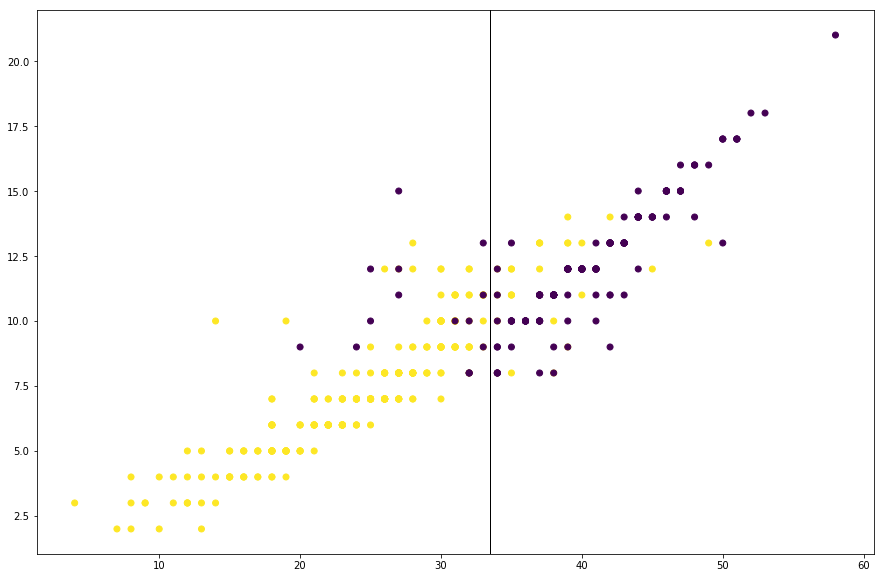

In [69]:
# 의사결정트리 1단계 정보를 이용한 시각화 예시
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel='walk'
plt.ylabel='view'
plt.scatter(x=data['walk'], y=data['view'], c=data['country'])
plt.axvline(x = 33.5, color='k', linewidth=1)
plt.show()

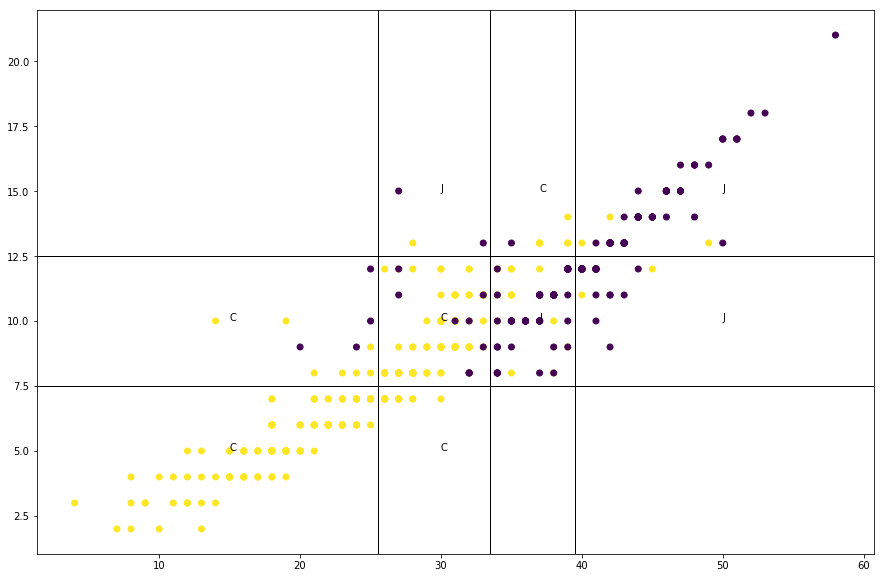

In [90]:
# 의사결정트리를 이용한 시각화 예시
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel='walk'
plt.ylabel='view'
plt.scatter(data['walk'], data['view'], c=data['country'])
plt.axvline(x = 33.5, color='k', linewidth=1)
plt.axvline(x = 39.5, color='k', linewidth=1)
plt.axvline(x = 25.5, color='k', linewidth=1)
plt.axhline(y = 7.5, color='k', linewidth=1)
plt.axhline(y = 12.5, color='k', linewidth=1)

plt.text(x=15, y=5, s='C')
plt.text(x=15, y=10, s='C')
plt.text(x=30, y=10, s='C')
plt.text(x=30, y=5, s='C')
plt.text(x=30, y=15, s='J')
plt.text(x=37, y=10, s='J')
plt.text(x=37, y=15, s='C')
plt.text(x=50, y=10, s='J')
plt.text(x=50, y=15, s='J')

plt.show()

### 실습예제
상단의 고객데이터를 이용해 의사결정트리의 깊이를 3으로 정하고, train과 test의 데이터를 9:1로 설정하여 예측하여 report 표를 출력하시오.